In [40]:
import numpy as np
import matplotlib.pyplot as plt

class Molecule:
    def __init__(self, concentration=0, diffusion_rate=1):
        self.concentration = concentration
        self.diffusion_rate = diffusion_rate

    def __repr__(self):
        return f"Molecule(concentration={self.concentration}, diffusion_rate={self.diffusion_rate})"

class ReactionDiffusionSystem:
    def __init__(self, width, height, molecule_a, molecule_b, feed_rate, kill_rate, diffusion_rate_a, diffusion_rate_b):
        self.width = width
        self.height = height
        self.molecule_a = molecule_a
        self.molecule_b = molecule_b
        self.feed_rate = feed_rate
        self.kill_rate = kill_rate
        self.diffusion_rate_a = diffusion_rate_a
        self.diffusion_rate_b = diffusion_rate_b
        self.grid_a = np.zeros((height, width))
        self.grid_b = np.zeros((height, width))

    def initialize(self, gradient_a_func):
        for y in range(self.height):
            for x in range(self.width):
                self.grid_a[y, x] = gradient_a_func(x, self.width)

    def update(self):
        next_grid_a = np.zeros((self.height, self.width))
        next_grid_b = np.zeros((self.height, self.width))

        for y in range(self.height):
            for x in range(self.width):
                a = self.grid_a[y, x]
                b = self.grid_b[y, x]

                a_normalized = max(0, min(a, 1))
                b_normalized = max(0, min(b, 1))

                da = self.diffusion_rate_a * self.laplacian(self.grid_a, x, y) - a_normalized * b_normalized * b_normalized + self.feed_rate * (1 - a_normalized)
                db = self.diffusion_rate_b * self.laplacian(self.grid_b, x, y) + a_normalized * b_normalized * b_normalized - (self.kill_rate + self.feed_rate) * b_normalized

                next_grid_a[y, x] = a + da
                next_grid_b[y, x] = b + db

        self.grid_a = next_grid_a
        self.grid_b = next_grid_b


    def laplacian(self, grid, x, y):
        total = 0
        total += grid[(y - 1) % self.height, x]     # top
        total += grid[y, (x - 1) % self.width]     # left
        total += grid[(y + 1) % self.height, x]     # bottom
        total += grid[y, (x + 1) % self.width]     # right
        total -= 4 * grid[y, x]   # center
        return total

    def plot(self):
        plt.imshow(self.grid_a, cmap='Reds', alpha=0.1, interpolation='nearest')
        plt.colorbar()
        plt.show()

def gradient_func_a(x, width):
    return x

def gradient_func_b(x, width):
    return x / (width - 1)

molecule_a = Molecule(concentration=1)

system = ReactionDiffusionSystem(width=50, height=50, molecule_a=molecule_a,
                                 feed_rate=0.055, kill_rate=0.062, diffusion_rate_a=1.0, diffusion_rate_b=1)
system.initialize(gradient_func_a)

for i in range(10):
    system.update()

system.plot()

TypeError: ReactionDiffusionSystem.__init__() missing 1 required positional argument: 'molecule_b'

## Single molecule

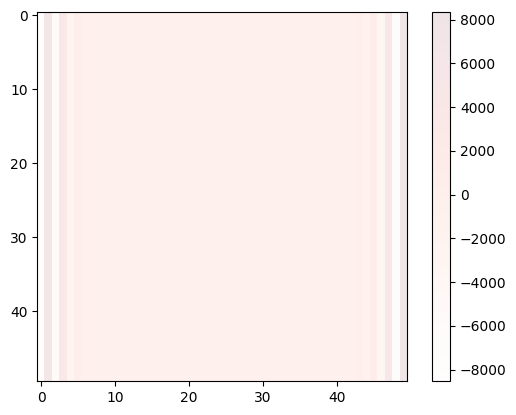

In [49]:
import numpy as np
import matplotlib.pyplot as plt

class Molecule:
    def __init__(self, concentration=0, diffusion_rate=1):
        self.concentration = concentration
        self.diffusion_rate = diffusion_rate

    def __repr__(self):
        return f"Molecule(concentration={self.concentration}, diffusion_rate={self.diffusion_rate})"

class ReactionDiffusionSystem:
    def __init__(self, width, height, molecule_a, feed_rate, kill_rate, diffusion_rate_a):
        self.width = width
        self.height = height
        self.molecule_a = molecule_a
        self.feed_rate = feed_rate
        self.kill_rate = kill_rate
        self.diffusion_rate_a = diffusion_rate_a
        self.grid_a = np.zeros((height, width))

    def initialize(self, gradient_a_func):
        for y in range(self.height):
            for x in range(self.width):
                self.grid_a[y, x] = gradient_a_func(x, self.width)

    def update(self):
        next_grid_a = np.zeros((self.height, self.width))

        for y in range(self.height):
            for x in range(self.width):
                a = self.grid_a[y, x]

                a_normalized = max(0, min(a, 1))

                da = self.diffusion_rate_a * self.laplacian(self.grid_a, x, y) - a_normalized * a_normalized * a_normalized + self.feed_rate * (1 - a_normalized)

                next_grid_a[y, x] = a + da

        self.grid_a = next_grid_a

    def laplacian(self, grid, x, y):
        total = 0
        total += grid[(y - 1) % self.height, x]     # top
        total += grid[y, (x - 1) % self.width]     # left
        total += grid[(y + 1) % self.height, x]     # bottom
        total += grid[y, (x + 1) % self.width]     # right
        total -= 4 * grid[y, x]   # center
        return total

    def plot(self):
        plt.imshow(self.grid_a, cmap='Reds', alpha=0.1, interpolation='nearest')
        plt.colorbar()
        plt.show()

def gradient_func_a(x, width):
    return x / width

molecule_a = Molecule(concentration=1)

system = ReactionDiffusionSystem(width=50, height=50, molecule_a=molecule_a,
                                 feed_rate=0.055, kill_rate=0.062, diffusion_rate_a=1.0)
system.initialize(gradient_func_a)

for i in range(10):
    system.update()

system.plot()


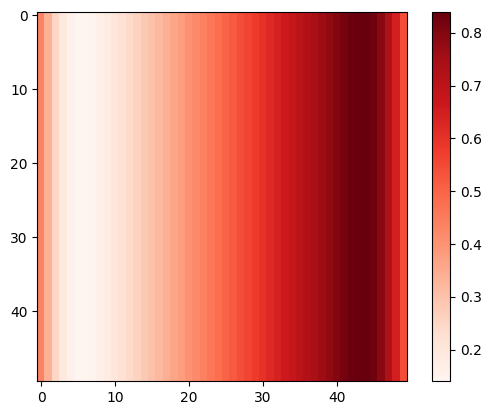

In [70]:
import numpy as np
import matplotlib.pyplot as plt

class Molecule:
    def __init__(self, concentration=0, diffusion_rate=1):
        self.concentration = concentration
        self.diffusion_rate = diffusion_rate

    def __repr__(self):
        return f"Molecule(concentration={self.concentration}, diffusion_rate={self.diffusion_rate})"

class ReactionDiffusionSystem:
    def __init__(self, width, height, molecule_a, diffusion_rate_a):
        self.width = width
        self.height = height
        self.molecule_a = molecule_a
        self.diffusion_rate_a = diffusion_rate_a
        self.grid_a = np.zeros((height, width))

    def initialize(self, gradient_a_func):
        for y in range(self.height):
            for x in range(self.width):
                self.grid_a[y, x] = gradient_a_func(x, self.width)

    def update(self):
        next_grid_a = np.zeros((self.height, self.width))

        for y in range(self.height):
            for x in range(self.width):
                a = self.grid_a[y, x]
                da = self.diffusion_rate_a * self.laplacian(self.grid_a, x, y)
                next_grid_a[y, x] = a + da

        self.grid_a = next_grid_a

    def laplacian(self, grid, x, y):
        total = 0
        total += grid[(y - 1) % self.height, x]     # top
        total += grid[y, (x - 1) % self.width]     # left
        total += grid[(y + 1) % self.height, x]     # bottom
        total += grid[y, (x + 1) % self.width]     # right
        total -= 4 * grid[y, x]   # center
        return total

    def plot(self):
        plt.imshow(self.grid_a, cmap='Reds', alpha=1, interpolation='nearest')
        plt.colorbar()
        plt.show()

def gradient_func_a(x, width):
    return x / width

molecule_a = Molecule(concentration=1)

system = ReactionDiffusionSystem(width=50, height=50, molecule_a=molecule_a, diffusion_rate_a=0.001)
system.initialize(gradient_func_a)

for i in range(5000):
    system.update()

system.plot()


Maximum iterations reached without convergence.


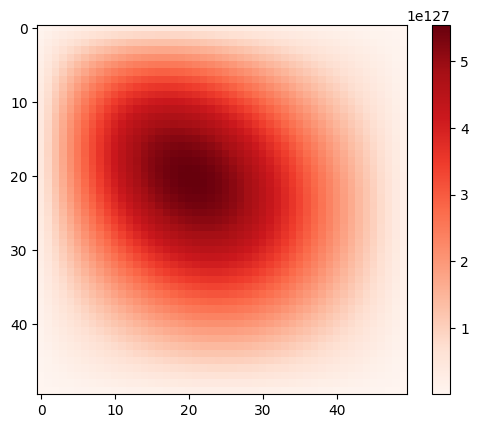

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

class Molecule:
    def __init__(self, concentration=0, diffusion_rate=1):
        self.concentration = concentration
        self.diffusion_rate = diffusion_rate

    def __repr__(self):
        return f"Molecule(concentration={self.concentration}, diffusion_rate={self.diffusion_rate})"

class ReactionDiffusionSystem:
    def __init__(self, width, height, molecule_a, diffusion_rate_a):
        self.width = width
        self.height = height
        self.molecule_a = molecule_a
        self.diffusion_rate_a = diffusion_rate_a
        self.grid_a = np.zeros((height, width))

    def initialize(self):
        # Initialize the center pixel with a concentration of 1
        center_x = self.width // 2
        center_y = self.height // 2
        self.grid_a[center_y, center_x] = molecule_a.concentration
        self.grid_a[10, 10] = molecule_a.concentration

    def update(self):
        # Define the diffusion kernel
        diffusion_kernel = np.array([[1, 1, 1],
                                     [1, 0.25, 1],
                                     [1, 1, 1]])

        # Perform diffusion using convolution
        da = self.diffusion_rate_a * convolve(self.grid_a, diffusion_kernel, mode='constant')

        # Update the concentration grid
        self.grid_a += da

    def plot(self):
        plt.imshow(self.grid_a, cmap='Reds', alpha=1, interpolation='nearest')
        plt.colorbar()
        plt.show()

    def is_converged(self, threshold=0.001):
        """Check if the concentration grid has converged."""
        change = np.max(np.abs(self.grid_a - np.mean(self.grid_a)))
        return change < threshold

molecule_a = Molecule(concentration=1)

system = ReactionDiffusionSystem(width=50, height=50, molecule_a=molecule_a, diffusion_rate_a=0.1)
system.initialize()

iterations = 0
max_iterations = 500  # Set your maximum iteration limit here

while not system.is_converged() and iterations < max_iterations:
    system.update()
    iterations += 1

if iterations == max_iterations:
    print("Maximum iterations reached without convergence.")
else:
    print(f"Converged after {iterations} iterations.")
system.plot()

Maximum iterations reached without convergence.


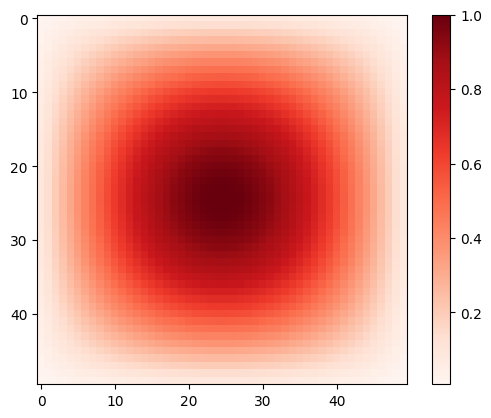

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

class Molecule:
    def __init__(self, concentration=0, diffusion_rate=1):
        self.concentration = concentration
        self.diffusion_rate = diffusion_rate

    def __repr__(self):
        return f"Molecule(concentration={self.concentration}, diffusion_rate={self.diffusion_rate})"

class ReactionDiffusionSystem:
    def __init__(self, width, height, molecule_a, diffusion_rate_a):
        self.width = width
        self.height = height
        self.molecule_a = molecule_a
        self.diffusion_rate_a = diffusion_rate_a
        self.grid_a = np.zeros((height, width))

    def initialize(self):
        # Initialize the center pixel with a concentration of 1
        center_x = self.width // 2
        center_y = self.height // 2
        self.grid_a[center_y, center_x] = molecule_a.concentration

    def update(self):
        # Define the diffusion kernel
        diffusion_kernel = np.array([[0.5, 0.5, 0.5],
                                     [0.5, 1, 0.5],
                                     [0.5, 0.5, 0.5]])

        # Perform diffusion using convolution
        da = self.diffusion_rate_a * convolve(self.grid_a, diffusion_kernel, mode='constant')

        # Update the concentration grid
        self.grid_a += da

        # Normalize values to a reasonable range
        max_val = np.max(self.grid_a)
        if max_val > 0:
            self.grid_a /= max_val

    def plot(self):
        plt.imshow(self.grid_a, cmap='Reds', alpha=1, interpolation='nearest')
        plt.colorbar()
        plt.show()

    def is_converged(self, threshold=0.1):
        """Check if the concentration grid has converged."""
        change = np.max(np.abs(self.grid_a - np.mean(self.grid_a)))
        return change < threshold

molecule_a = Molecule(concentration=1)

system = ReactionDiffusionSystem(width=50, height=50, molecule_a=molecule_a, diffusion_rate_a=0.01)
system.initialize()

iterations = 0
max_iterations = 50000  # Set your maximum iteration limit here

while not system.is_converged() and iterations < max_iterations:
    system.update()
    iterations += 1

if iterations == max_iterations:
    print("Maximum iterations reached without convergence.")
else:
    print(f"Converged after {iterations} iterations.")
system.plot()

Maximum iterations reached without convergence.


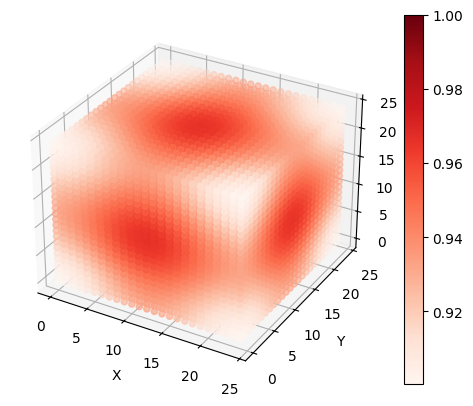

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from mpl_toolkits.mplot3d import Axes3D

class Molecule:
    def __init__(self, concentration=0, diffusion_rate=1):
        self.concentration = concentration
        self.diffusion_rate = diffusion_rate

    def __repr__(self):
        return f"Molecule(concentration={self.concentration}, diffusion_rate={self.diffusion_rate})"

class ReactionDiffusionSystem:
    def __init__(self, width, height, depth, molecule_a, diffusion_rate_a):
        self.width = width
        self.height = height
        self.depth = depth
        self.molecule_a = molecule_a
        self.diffusion_rate_a = diffusion_rate_a
        self.grid_a = np.zeros((depth, height, width))

    def initialize(self):
        # Initialize the center pixel with a concentration of 1
        center_x = self.width // 2
        center_y = self.height // 2
        center_z = self.depth // 2
        self.grid_a[center_x, center_y, center_z] = self.molecule_a.concentration
        # self.grid_a[center_x + 10, center_y + 10, center_z + 10] = self.molecule_a.concentration
        # self.grid_a[0, 0, 10] = self.molecule_a.concentration

    def update(self):
            # Define the 3D diffusion kernel
        diffusion_kernel = np.array([[[0, 0.125, 0],
                                    [0.125, 0.25, 0.125],
                                    [0, 0.125, 0]],

                                    [[0.125, 0.25, 0.125],
                                    [0.25, 1, 0.25],
                                    [0.125, 0.25, 0.125]],

                                    [[0, 0.125, 0],
                                    [0.125, 0.25, 0.125],
                                    [0, 0.125, 0]]])

        # Perform diffusion using convolution
        da = self.diffusion_rate_a * convolve(self.grid_a, diffusion_kernel, mode='wrap')

        # Update the concentration grid
        self.grid_a += da

        # Normalize values to a reasonable range
        max_val = np.max(self.grid_a)
        if max_val > 0:
            self.grid_a /= max_val

    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        z, y, x = self.grid_a.nonzero()
        c = self.grid_a[z, y, x]
        
        img = ax.scatter(x, y, z, c=c, cmap='Reds', marker='o')
        fig.colorbar(img)
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.show()

    def is_converged(self, threshold=0.01):
        """Check if the concentration grid has converged."""
        change = np.max(np.abs(self.grid_a - np.mean(self.grid_a)))
        return change < threshold

molecule_a = Molecule(concentration=1)

system = ReactionDiffusionSystem(width=25, height=25, depth=25, molecule_a=molecule_a, diffusion_rate_a=1)
system.initialize()

iterations = 0
max_iterations = 500  # Set your maximum iteration limit here
while not system.is_converged() and iterations < max_iterations:
    system.update()
    iterations += 1

if iterations == max_iterations:
    print("Maximum iterations reached without convergence.")
else:
    print(f"Converged after {iterations} iterations.")
system.plot()

Maximum iterations reached without convergence.


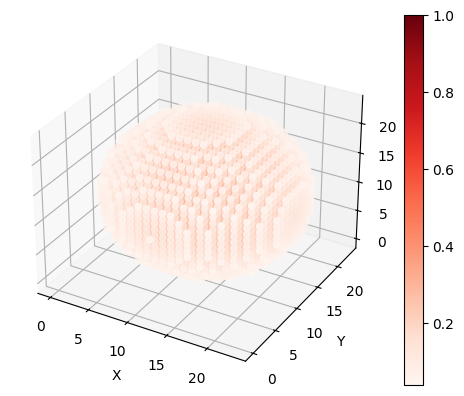

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from mpl_toolkits.mplot3d import Axes3D

class Molecule:
    def __init__(self, concentration=0, diffusion_rate=1):
        self.concentration = concentration
        self.diffusion_rate = diffusion_rate

    def __repr__(self):
        return f"Molecule(concentration={self.concentration}, diffusion_rate={self.diffusion_rate})"

class ReactionDiffusionSystem:
    def __init__(self, radius, molecule_a, diffusion_rate_a):
        self.radius = radius
        self.diameter = 2 * radius
        self.molecule_a = molecule_a
        self.diffusion_rate_a = diffusion_rate_a
        self.grid_a = np.zeros((self.diameter, self.diameter, self.diameter))
        self.sphere_mask = self.create_sphere_mask()

    def create_sphere_mask(self):
        """Create a spherical mask within a cubic grid."""
        z, y, x = np.indices((self.diameter, self.diameter, self.diameter))
        center = self.radius
        distance = np.sqrt((x - center)**2 + (y - center)**2 + (z - center)**2)
        return distance <= self.radius

    def initialize(self):
        # Initialize the center pixel with a concentration of 1
        center = self.radius
        self.grid_a[center, center, center] = self.molecule_a.concentration

    def update(self):
        # Define the 3D diffusion kernel for spherical coordinates
        diffusion_kernel = np.array([[[0, 0.125, 0],
                                      [0.125, 0.25, 0.125],
                                      [0, 0.125, 0]],

                                     [[0.125, 0.25, 0.125],
                                      [0.25, 1, 0.25],
                                      [0.125, 0.25, 0.125]],

                                     [[0, 0.125, 0],
                                      [0.125, 0.25, 0.125],
                                      [0, 0.125, 0]]])

        # Perform diffusion using convolution with boundary conditions
        da = self.diffusion_rate_a * convolve(self.grid_a, diffusion_kernel, mode='wrap')

        # Update the concentration grid only within the sphere
        self.grid_a[self.sphere_mask] += da[self.sphere_mask]

        # Normalize values to a reasonable range within the sphere
        max_val = np.max(self.grid_a[self.sphere_mask])
        if max_val > 0:
            self.grid_a[self.sphere_mask] /= max_val

    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        z, y, x = self.grid_a.nonzero()
        c = self.grid_a[z, y, x]
        
        img = ax.scatter(x, y, z, c=c, cmap='Reds', marker='o')
        fig.colorbar(img)
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.show()

    def is_converged(self, threshold=0.01):
        """Check if the concentration grid has converged."""
        change = np.max(np.abs(self.grid_a[self.sphere_mask] - np.mean(self.grid_a[self.sphere_mask])))
        return change < threshold

molecule_a = Molecule(concentration=10)

system = ReactionDiffusionSystem(radius=12, molecule_a=molecule_a, diffusion_rate_a=0.5)
system.initialize()

iterations = 0
max_iterations = 10000  # Set your maximum iteration limit here
while not system.is_converged() and iterations < max_iterations:
    system.update()
    iterations += 1

if iterations == max_iterations:
    print("Maximum iterations reached without convergence.")
else:
    print(f"Converged after {iterations} iterations.")
system.plot()


Converged after 442 iterations.


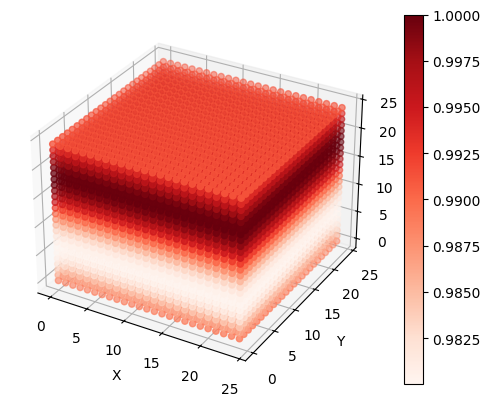

In [185]:
from typing import Optional
from typing_extensions import override

import numpy as np
from scipy.ndimage import convolve


class MoleculeType(): 
    """A molecule involved in the reaction-diffusion system.

    Args:
        concentration (float): The initial concentration of the molecule.
        diffusion_rate (float): The diffusion rate of the molecule.

    Attributes:
        concentration (float): The concentration of the molecule.
        diffusion_rate (float): The diffusion rate of the molecule.
    """

    def __init__(self, name, conc, D, mat = None):
        self._name = name
        self.conc = conc
        self.D = D
        self._mat = mat

    def __repr__(self):
        str = (f"Molecule(concentration={self.conc}"
               "diffusion_rate={self.diffusion_rate})")
        return str

    @property
    def name(self) -> str:
        """Name of the cell. Also defines the name of related forces and
        collections of effectors.
        """
        return self.name
        
    @name.setter
    def name(self, name: str):
        self.name = name


class ReactionDiffusionSystem:
    """A reaction-diffusion system simulation.

    Args:
        width (int): The width of the 2D grid.
        height (int): The height of the 2D grid.
        molecule_a (Molecule): The first type of molecule in the system.
        diffusion_rate_a (float): The diffusion rate of molecule A.

    Attributes:
        width (int): The width of the boundary.
        height (int): The height of the boundary.
        molecule_a (Molecule): The first type of molecule in the system.
        diffusion_rate_a (float): The diffusion rate of molecule A.
        grid_a (numpy.ndarray): The concentration grid. 
    """

    def __init__(self, size: tuple, mol_a: MoleculeType):
        self.size = size
        self.mol_a = mol_a
        self.grid = np.zeros((size[0], size[1], size[2]))

    def initialize(self, initial_concentration: Optional[float] = None):
        # Initialize with a linear gradient of concentration if initial_concentration is not None
        if initial_concentration is not None:
            # Create linear gradient along the X-axis
            gradient = np.linspace(0, initial_concentration, self.size[0])
            # Set the concentration grid with the linear gradient along the X-axis
            for i in range(self.size[0]):
                self.grid[i, :, :] = gradient[i]
        else:
            # Initialize the center pixel with a concentration of 1
            center_x = self.size[0] // 2
            center_y = self.size[1] // 2
            center_z = self.size[2] // 2
            self.grid[center_x, center_y, center_z] = self.mol_a.conc

    def update(self):
        # Define the 3D diffusion kernel
        diffusion_kernel = np.array([[[0, 0.125, 0],
                                    [0.125, 0.25, 0.125],
                                    [0, 0.125, 0]],

                                    [[0.125, 0.25, 0.125],
                                        [0.25, 1, 0.25],
                                        [0.125, 0.25, 0.125]],

                                    [[0, 0.125, 0],
                                        [0.125, 0.25, 0.125],
                                        [0, 0.125, 0]]])

        # Perform diffusion using convolution
        da = self.mol_a.D * convolve(self.grid, diffusion_kernel, mode='wrap')

        # Update the concentration grid
        self.grid += da

        # Normalize values to a reasonable range
        max_val = np.max(self.grid)
        if max_val > 0:
            self.grid /= max_val

    def is_converged(self, threshold=0.01):
        """Check if the concentration grid has converged."""
        change = np.max(np.abs(self.grid - np.mean(self.grid)))
        return change < threshold
    

    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        z, y, x = self.grid.nonzero()
        c = self.grid[z, y, x]
        
        img = ax.scatter(x, y, z, c=c, cmap='Reds')
        fig.colorbar(img)
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.show()
    

def main():
    # Define molecule types
    mol_A = MoleculeType("molA", conc=5, D=1)

    # Create reaction-diffusion system
    system = ReactionDiffusionSystem(size=(25, 25, 25), mol_a=mol_A)
    system.initialize(initial_concentration=5)  # Initialize with a linear gradient

    # Set simulation parameters
    max_iterations = 500

    # Run simulation
    iterations = 0
    while not system.is_converged() and iterations < max_iterations:
        system.update()
        iterations += 1

    if iterations == max_iterations:
        print("Maximum iterations reached without convergence.")
    else:
        print(f"Converged after {iterations} iterations.")
    system.plot()

if __name__ == "__main__":
    main()